# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [12]:
chipo = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [19]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

In [20]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


### Step 5. Create a histogram of the top 5 items bought

In [21]:
top_5 = chipo.groupby('item_name').quantity.sum().sort_values(ascending = False)[0:5]

In [22]:
top_5

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

Text(0.5, 1.0, "Most ordered Chipotle's Items")

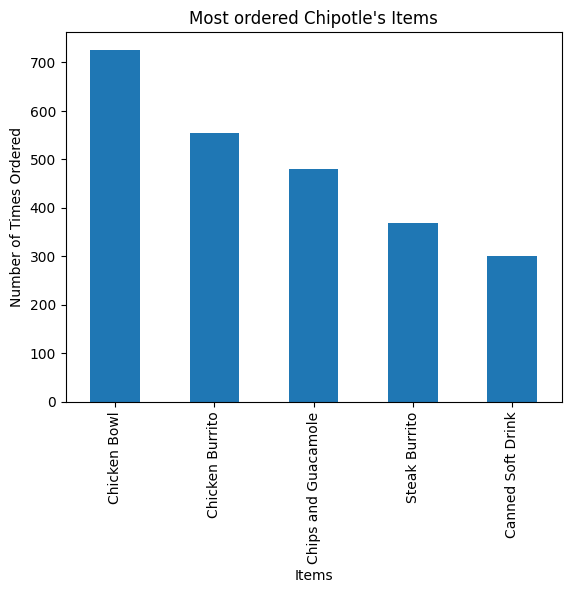

In [23]:
chipo.item_name.value_counts()[0:5].plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

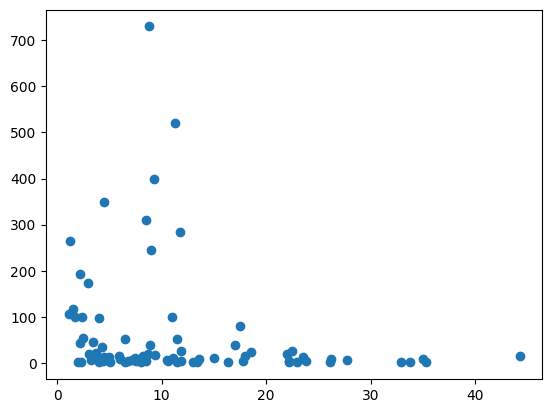

In [24]:
fig, ax = plt.subplots()
price_cnt = chipo.groupby('item_price').quantity.sum()
ax.scatter(price_cnt.index.tolist(), price_cnt.tolist())

<ipython-input-25-8745b1f13048>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders = chipo.groupby('order_id').sum()


(0.0, 36.7)

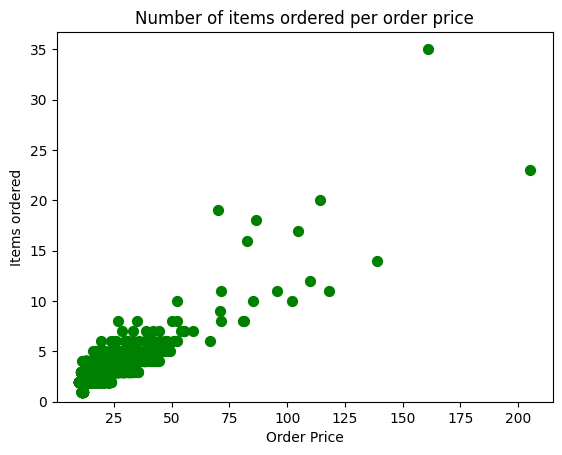

In [25]:
orders = chipo.groupby('order_id').sum()

plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [27]:
badsale = chipo.groupby('item_name').quantity.sum().sort_values(ascending = True)[0:5]
badsale

item_name
Carnitas Salad                       1
Veggie Crispy Tacos                  1
Chips and Mild Fresh Tomato Salsa    1
Crispy Tacos                         2
Salad                                2
Name: quantity, dtype: int64

Text(0.5, 1.0, "Most ordered Chipotle's Items")

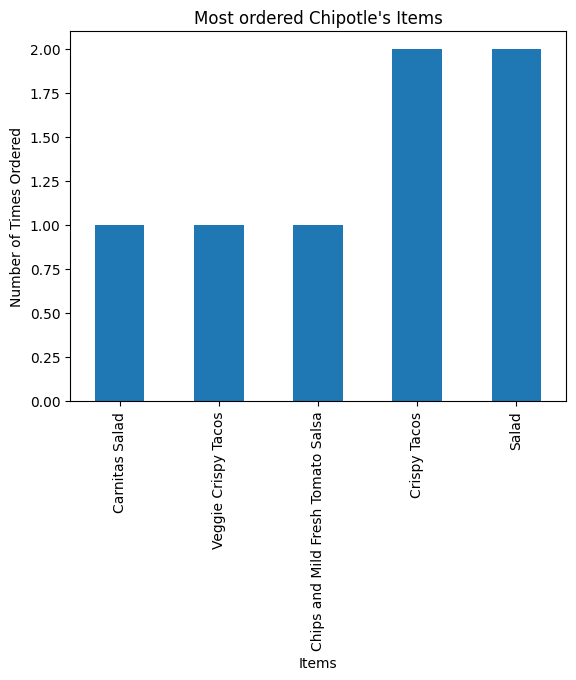

In [31]:
badsale.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')